# Happy Customers
This program takes in a csv file of survey data from a client and uses it to train a machine learning model to predict customer happiness.
The CSV file contains 7 features. The Y value will be a binary happiness value while the other features are integers from 1-5.  These attributes are as follows:

X1 - The order was delivered on time

X2 - The contents of the order was as expected

X3 - Ordered everything they wanted to

X4 - Paid a good price for the order

X5 - Satisfied with the order

X6 - The app made ordering easy

Further analysis will be done to learn which attributes most significantly affect customer happiness

In [1]:
## Import Modules
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import csv
import matplotlib.pyplot as plt
import random
import pandas as pd
import seaborn as sn
from sklearn.metrics import confusion_matrix, classification_report, f1_score                                                                                                                                                                                                                                                                                           

In [2]:
# Read in data
path = 'data.csv'
data = pd.read_csv(path)
data.columns = ['happinessStatus', 'onTime', 'expectedContents', 
                'allOrdered', 'goodPrice', 'orderSatisfication', 'easyOrdering']
data.head()

,happinessStatus,onTime,expectedContents,allOrdered,goodPrice,orderSatisfication,easyOrdering
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


# Visualize the data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   happinessStatus     126 non-null    int64
 1   onTime              126 non-null    int64
 2   expectedContents    126 non-null    int64
 3   allOrdered          126 non-null    int64
 4   goodPrice           126 non-null    int64
 5   orderSatisfication  126 non-null    int64
 6   easyOrdering        126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


In [4]:
data.describe()

,happinessStatus,onTime,expectedContents,allOrdered,goodPrice,orderSatisfication,easyOrdering
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [5]:
# Check happines status stats
data['happinessStatus'].value_counts()

1    69
0    57
Name: happinessStatus, dtype: int64

In [6]:
data.groupby('happinessStatus').mean()

,onTime,expectedContents,allOrdered,goodPrice,orderSatisfication,easyOrdering
happinessStatus,,,,,,
0,4.087719,2.561404,3.140351,3.684211,3.368421,4.105263
1,4.536232,2.507246,3.449275,3.797101,3.884058,4.376812


In [7]:
def analyzeAttribute(data, colName) :
    # Display Average
    print("Average " + colName + " value: ", data[colName].mean())
    
    # Plot histogram
    bins = np.arange(1,7) - 0.5
    plt.hist(data[colName], bins)
    plt.title(colName)
    plt.show()
    

Average onTime value:  4.333333333333333


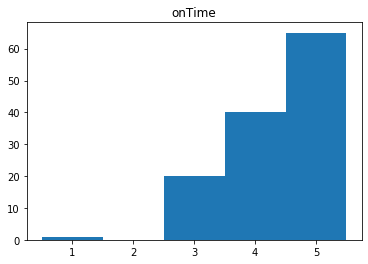

Average expectedContents value:  2.5317460317460316


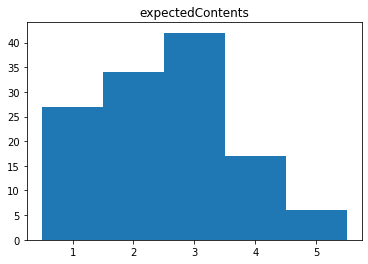

Average allOrdered value:  3.3095238095238093


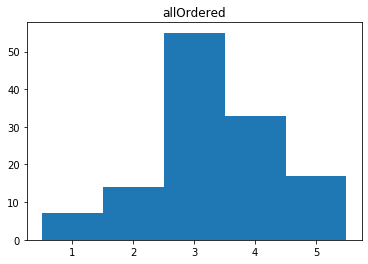

Average goodPrice value:  3.746031746031746


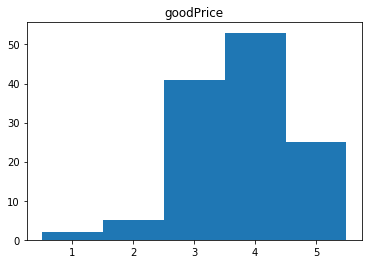

Average orderSatisfication value:  3.6507936507936507


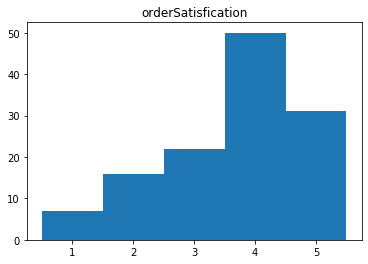

Average easyOrdering value:  4.253968253968254


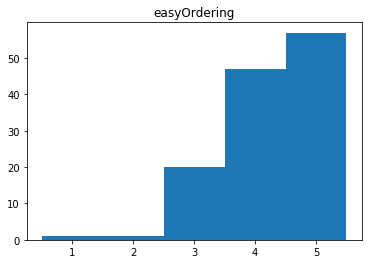

In [8]:
for i in range(1,7) :
    analyzeAttribute(data, data.columns[i])

# Preprocess Data
Divide into 80% training, 20% testing


In [9]:
# Divide Data into X and Y
X = data.drop(columns='happinessStatus')
Y = data['happinessStatus']

# Split data into training and testing
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = 0.2, random_state = 0)

print(xTrain.shape)
print(yTrain.shape)
print(xTest.shape)
print(yTest.shape)

(100, 6)
(100,)
(26, 6)
(26,)


# Train Models
Create various models here and train them using the training data.  Test them on the separate test data and evaluate them with visual aids.

# 1. Logistic regression
sklearn

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

logReg = LogisticRegression(max_iter=100000)
logReg = logReg.fit(xTrain, yTrain)
yPredict = logReg.predict(xTest)

In [11]:
def resultsReport(actual, predictions) :
    
    # Visualize classification report with precision, recall and F1 score
    print(classification_report(actual, predictions))

    # Create Confusion matrix vector
    confMatrix = confusion_matrix(actual, predictions)
    dfConfMatrix = pd.DataFrame(confMatrix, index = [i for i in "01"], 
                                columns = [i for i in "01"])

    # Plot Confusion matrix
    sn.heatmap(dfConfMatrix, annot = True)
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()

              precision    recall  f1-score   support

           0       0.71      0.38      0.50        13
           1       0.58      0.85      0.69        13

    accuracy                           0.62        26
   macro avg       0.65      0.62      0.59        26
weighted avg       0.65      0.62      0.59        26



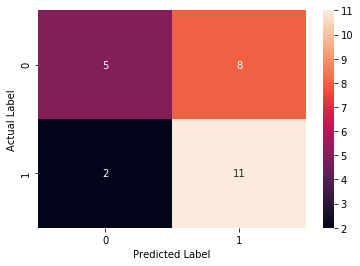

In [12]:
resultsReport(yTest, yPredict)

# 2. Support Vector Machine (SVM)
Outputs a hyperplane that best separates the data points, thereby classifying inputs as one class or another

In [108]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler


SVMachine = Pipeline([('scale', StandardScaler()),# Scale inputs to 0 mean and 1 variance
                  ('SVM', svm.SVC())])
SVMachine = SVMachine.fit(xTrain, yTrain)

yPredict = SVMachine.predict(xTest)

              precision    recall  f1-score   support

           0       0.50      0.38      0.43        13
           1       0.50      0.62      0.55        13

    accuracy                           0.50        26
   macro avg       0.50      0.50      0.49        26
weighted avg       0.50      0.50      0.49        26



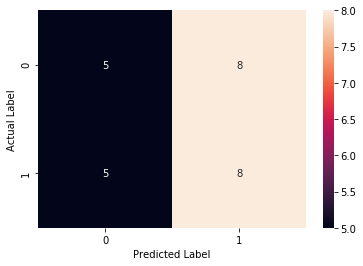

In [109]:
resultsReport(yTest, yPredict)

# 3. Gaussian Naive Bays
Model applies Bayes' theorem as a probabilistic classifier

In [15]:
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB()
GNB = GNB.fit(xTrain, yTrain)

yPredict = GNB.predict(xTest)

              precision    recall  f1-score   support

           0       0.67      0.46      0.55        13
           1       0.59      0.77      0.67        13

    accuracy                           0.62        26
   macro avg       0.63      0.62      0.61        26
weighted avg       0.63      0.62      0.61        26



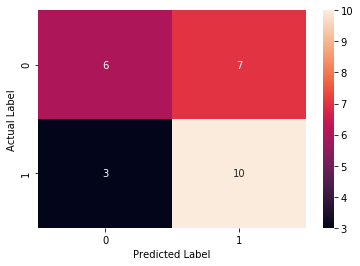

In [16]:
resultsReport(yTest, yPredict)

# 4. Stochastic Gradient Descent


In [17]:
from sklearn.linear_model import SGDClassifier

SGD = SGDClassifier()
SGD = SGD.fit(xTrain, yTrain)

yPredict = SGD.predict(xTest)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.50      1.00      0.67        13

    accuracy                           0.50        26
   macro avg       0.25      0.50      0.33        26
weighted avg       0.25      0.50      0.33        26



/Users/andrewmullen/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


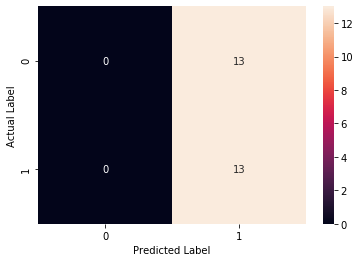

In [18]:
resultsReport(yTest, yPredict)

# 4. K Nearest Neighbours

In [19]:
from sklearn.neighbors import KNeighborsClassifier

kRange = range(1,75)
results = []

# Test out a range of different k values
for k in kRange :
    KNN = KNeighborsClassifier(n_neighbors = k)
    KNN = KNN.fit(xTrain, yTrain)
    
    yPredict = KNN.predict(xTest)
    
    results.append(f1_score(yTest, yPredict))
    
print(results.index(max(results))+1, max(results)) # +1 because index starts at 0 and our results start with a kvalue of 1


10 0.7407407407407408


Text(0, 0.5, 'F1 Score')

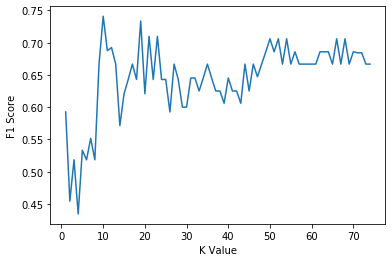

In [20]:
plt.plot(range(1,len(results)+1), results)
plt.xlabel("K Value")
plt.ylabel("F1 Score")

In [21]:
# Recreate k nearest neighbours model with max f1 score aka where k = 10
KNN = KNeighborsClassifier(n_neighbors=10)
KNN = KNN.fit(xTrain, yTrain)

yPredict = KNN.predict(xTest)

              precision    recall  f1-score   support

           0       0.75      0.69      0.72        13
           1       0.71      0.77      0.74        13

    accuracy                           0.73        26
   macro avg       0.73      0.73      0.73        26
weighted avg       0.73      0.73      0.73        26



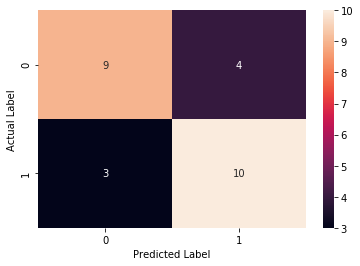

In [22]:
resultsReport(yTest, yPredict)

# 5. Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(xTrain, yTrain)

yPredict = tree.predict(xTest)

              precision    recall  f1-score   support

           0       0.50      0.54      0.52        13
           1       0.50      0.46      0.48        13

    accuracy                           0.50        26
   macro avg       0.50      0.50      0.50        26
weighted avg       0.50      0.50      0.50        26



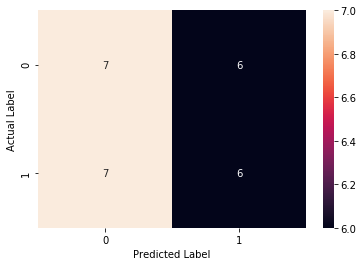

In [25]:
resultsReport(yTest, yPredict)

# 6. Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf = rf.fit(xTrain, yTrain)

yPredict = rf.predict(xTest)

              precision    recall  f1-score   support

           0       0.55      0.46      0.50        13
           1       0.53      0.62      0.57        13

    accuracy                           0.54        26
   macro avg       0.54      0.54      0.54        26
weighted avg       0.54      0.54      0.54        26



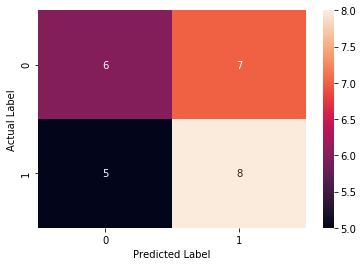

In [27]:
resultsReport(yTest, yPredict)

# Hyperparameter Tuning
Change the various hyperparameters on models of interest -> KNN, SVM

In [43]:
# Hyperparameters list
n_neighbors = range(1,20)
weights = ['uniform', 'distance']
algo = ['auto', 'ball_tree', 'kd_tree', 'brute']
leafSize = range(1,30)
power = [1,2]

bestScore = 0
hyperParameterString = ''

bestModel = KNeighborsClassifier()
for neigh in n_neighbors :
    for weight in weights :
        for alg in algo :
            for leaf in leafSize :
                for p in power:
                    KNN = KNeighborsClassifier(n_neighbors = neigh,
                                               weights = weight,
                                               algorithm = alg,
                                               leaf_size = leaf,
                                               p = p)
                    KNN = KNN.fit(xTrain, yTrain)

                    yPredict = KNN.predict(xTest)

                    if f1_score(yTest, yPredict) > bestScore :
                        bestScore = f1_score(yTest, yPredict)
                        hyperParameterString = str(neigh) + '_' + weight + '_' + alg + '_' + str(leaf) + '_' + str(p)
                        


                        
print(bestScore)
print(hyperParameterString)
    

0.7741935483870968
14_uniform_auto_25_1


With this new hyperparamter tuned model the accuracy was improved from 73% to 77% (An increase of 4%).  The model that achieved this used a k value of 15, a uniform weight, auto algorithm, a leaf size of 25 and a power parameter of 1.  Both the weights and algorithm parameters were the same as what is used in the default settings of the model.

In [44]:
# Recreate k nearest neighbours model with max f1 score aka where k = 10
KNN = KNeighborsClassifier(n_neighbors=14, weights='uniform', algorithm='auto', leaf_size=25, p=1)
KNN = KNN.fit(xTrain, yTrain)

yPredict = KNN.predict(xTest)

0.7741935483870968
              precision    recall  f1-score   support

           0       0.88      0.54      0.67        13
           1       0.67      0.92      0.77        13

    accuracy                           0.73        26
   macro avg       0.77      0.73      0.72        26
weighted avg       0.77      0.73      0.72        26



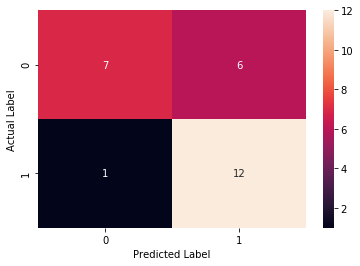

In [45]:
print(f1_score(yTest, yPredict))
resultsReport(yTest, yPredict)

In [69]:
# SVM
# Hyper parameter options
kernelType = ['linear', 'poly', 'rbf', 'sigmoid']#, 'precomputed']
degree = [1, 2, 3, 4] # Only applicable for kernel = poly
gamma = ['scale', 'auto'] # Only applicable for kernel = rbf poly or sigmoid

# Performance trackign variables
bestScore = 0
hyperParameterString = ''

for k in kernelType :
    for d in degree :
        #for g in gamma :
            
            SVMachine = Pipeline([('scale', StandardScaler()),# Scale inputs to 0 mean and 1 variance
                              ('SVM', svm.SVC(kernel=k, degree=d, gamma=g))])
            SVMachine = SVMachine.fit(xTrain, yTrain)

            yPredict = SVMachine.predict(xTest)
            
            if f1_score(yTest, yPredict) > bestScore :
                bestScore = f1_score(yTest, yPredict)
                hyperParameterString = k + '_' + str(d) + '_' + g
                
print(bestScore)
print(hyperParameterString)

0.8000000000000002
linear_1_scale


In [70]:
# Recreate SVM model with highest score (80%) -> kernel = linear, degree = 1, gamma = scale
SVMachine = Pipeline([('scale', StandardScaler()),# Scale inputs to 0 mean and 1 variance
                    ('SVM', svm.SVC(kernel='linear', degree=1, gamma='scale'))])
SVMachine = SVMachine.fit(xTrain, yTrain)

yPredict = SVMachine.predict(xTest)

0.8000000000000002
              precision    recall  f1-score   support

           0       0.89      0.62      0.73        13
           1       0.71      0.92      0.80        13

    accuracy                           0.77        26
   macro avg       0.80      0.77      0.76        26
weighted avg       0.80      0.77      0.76        26



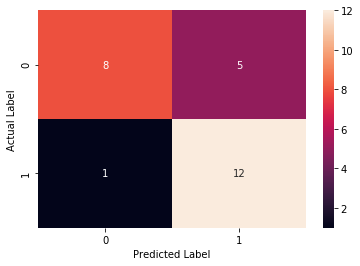

In [71]:
print(f1_score(yTest, yPredict))
resultsReport(yTest, yPredict)

In [78]:
# Stocahstic Gradient Descent Hyperparameter tuning
# Hyperparameter options
loss = ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron']
penalty = ['l2', 'l1', 'elasticnet']
alpha = [0.000001, 0.00001, 0.0001, 0.001, 0.01]

# Performance trackign variables
bestScore = 0
hyperParameterString = ''

for l in loss :
    for p in penalty :
        for a in alpha :
            SGD = SGDClassifier(loss=l, penalty=p, alpha=a)
            SGD = SGD.fit(xTrain, yTrain)

            yPredict = SGD.predict(xTest)
            
            if f1_score(yTest, yPredict) > bestScore :
                bestScore = f1_score(yTest, yPredict)
                hyperParameterString = l + '_' + p + '_' + str(a)
                
# Print results
print(bestScore)
print(hyperParameterString)

0.7428571428571429
hinge_l1_0.001


In [86]:
# Recreate model with highest f1 score
SGD = SGDClassifier(loss='hinge', penalty='l1', alpha=0.001)
SGD = SGD.fit(xTrain, yTrain)

yPredict = SGD.predict(xTest)

0.7272727272727274
              precision    recall  f1-score   support

           0       0.83      0.38      0.53        13
           1       0.60      0.92      0.73        13

    accuracy                           0.65        26
   macro avg       0.72      0.65      0.63        26
weighted avg       0.72      0.65      0.63        26



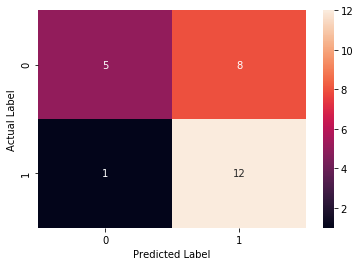

In [87]:
print(f1_score(yTest, yPredict))
resultsReport(yTest, yPredict)

In [104]:
# Decision Tree
# Hyperparameter options
criterion = ['gini', 'entropy']
splitter = ['best', 'random']
max_depth = range(3,10)

# Performance trackign variables
bestScore = 0
hyperParameterString = ''

for c in criterion :
    for s in splitter :
        for m in max_depth :
            tree = DecisionTreeClassifier(criterion=c, splitter=s, max_depth=m)
            tree = tree.fit(xTrain, yTrain)
            
            yPredict = tree.predict(xTest)
            
            if f1_score(yTest, yPredict) > bestScore :
                bestScore = f1_score(yTest, yPredict)
                hyperParameterString = c + '_' + s + '_' + str(m)
                
print(bestScore)
print(hyperParameterString)

0.7096774193548387
entropy_random_5


In [102]:
# Recreate decision tree with best f1 score (70%)
tree = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=4)
tree = tree.fit(xTrain, yTrain)

yPredict = tree.predict(xTest)

0.6470588235294118
              precision    recall  f1-score   support

           0       0.60      0.23      0.33        13
           1       0.52      0.85      0.65        13

    accuracy                           0.54        26
   macro avg       0.56      0.54      0.49        26
weighted avg       0.56      0.54      0.49        26



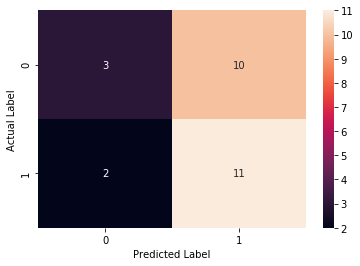

In [103]:
print(f1_score(yTest, yPredict))
resultsReport(yTest, yPredict)

This section showcases the need for tuning hyperparameters.  K nearest neighbours and SVM showcased increases in accuracy with a 74 to 77% and 55 to 80% respectively.  While changing hyperparameters for the decision tree and random forest brought increased results, due to the nature of the models these results couldn't be reproduced with any reliability as the accuracy would be anywhere from 50% to 85% and would have a heavy bias on predicting customers to be happy.

# Feature Importance/Selection
Here we will go through the models to find which features contributed the most to their F1 scores

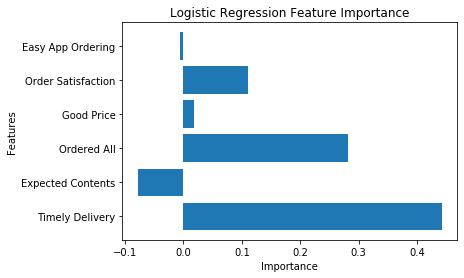

In [52]:
# 1. Logistic Regression feature importance
columns = ['Timely Delivery', 'Expected Contents', 'Ordered All', 'Good Price',
           'Order Satisfaction', 'Easy App Ordering']

plt.barh(columns, logReg.coef_[0])
plt.title('Logistic Regression Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

[ 8.20745907e-01  6.03511894e-05 -5.57442869e-05 -1.77831296e-05
  1.28196526e-04  5.76632048e-05]


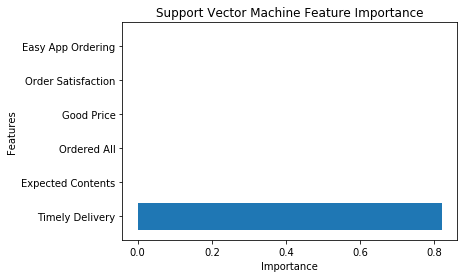

In [72]:
print(SVMachine['SVM'].coef_[0])

plt.barh(columns, SVMachine['SVM'].coef_[0])
plt.title('Support Vector Machine Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

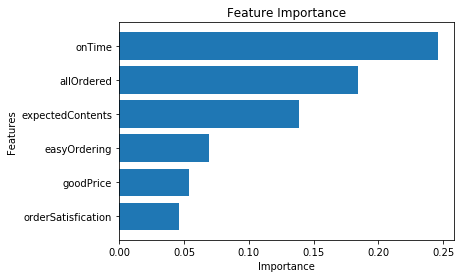

In [110]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(KNN, xTest, yTest)            
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.title('Feature Importance')
plt.ylabel('Features')
plt.xlabel('Importance')
plt.show()

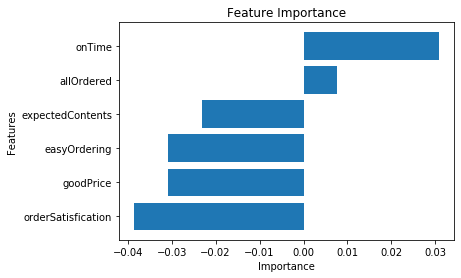

In [111]:
perm_importance = permutation_importance(SVMachine, xTest, yTest)            
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.title('Feature Importance')
plt.ylabel('Features')
plt.xlabel('Importance')
plt.show()

Both of these models rank the features in the same order of importance. Next the same models will be trained with the optimal hyperparameters dropping the least important feature of the data set everytime

In [113]:
X.columns[sorted_idx]

Index(['orderSatisfication', 'goodPrice', 'easyOrdering', 'expectedContents',
       'allOrdered', 'onTime'],
      dtype='object')

In [ ]:
'onTime', 'expectedContents', 
                'allOrdered', 'goodPrice', 'orderSatisfication', 'easyOrdering'

In [ ]:
SVMachine = Pipeline([('scale', StandardScaler()),# Scale inputs to 0 mean and 1 variance
                    ('SVM', svm.SVC(kernel='linear', degree=1, gamma='scale'))])
SVMachine = SVMachine.fit(xTrain, yTrain)

yPredict = SVMachine.predict(xTest)

KNN = KNeighborsClassifier(n_neighbors=14, weights='uniform', algorithm='auto', leaf_size=25, p=1)
KNN = KNN.fit(xTrain, yTrain)

yPredict = KNN.predict(xTest)

In [140]:
# Create a copy of the data set
Xcopy = X.copy()

# Initialize variable with the correct order for dropping columns
columnDropOrder = X.columns[sorted_idx]

# Initialize variables to track models F1 scores
SVMScore = []
KNNScore = []

for i in range(len(columnDropOrder)) :
    # Create train, test data split with new feature dropped category
    xTrainNew, xTestNew, yTrainNew, yTestNew = train_test_split(Xcopy, Y, test_size = 0.2)

    # Train models on the new reduced data
    # SVM
    SVMachine = Pipeline([('scale', StandardScaler()),# Scale inputs to 0 mean and 1 variance
                    ('SVM', svm.SVC(kernel='linear', degree=1, gamma='scale'))])
    SVMachine = SVMachine.fit(xTrain, yTrain)

    SVMPredict = SVMachine.predict(xTest)

    #KNN
    KNN = KNeighborsClassifier(n_neighbors=14, weights='uniform', algorithm='auto', leaf_size=25, p=1)
    KNN = KNN.fit(xTrain, yTrain)

    KNNPredict = KNN.predict(xTest)
    
    # Record Results
    SVMScore.append(f1_score(yTestNew, SVMPredict))
    KNNScore.append(f1_score(yTestNew, KNNPredict))
    
    # Drop next lowest important feature
    Xcopy = Xcopy.drop(columns=columnDropOrder[i])
    

print(SVMScore)
print(KNNScore)

[0.6206896551724139, 0.6666666666666667, 0.3333333333333333, 0.5333333333333333, 0.5161290322580646, 0.45161290322580644]
[0.5333333333333333, 0.6451612903225806, 0.48, 0.5806451612903226, 0.5625000000000001, 0.43750000000000006]
